In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('fall_new.csv')

In [4]:
X=df[['TIME','SL','BP','HR','CIRCLUATION']]
y=df['FALL']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111ab32e8>,
      dtype=object)

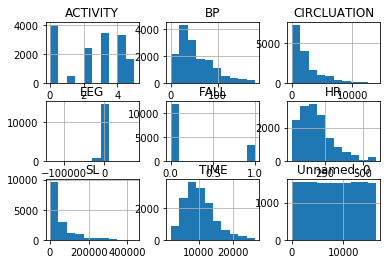

In [5]:
df.hist()

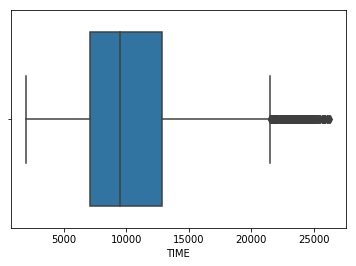

In [6]:
import seaborn as sns
sns.boxplot(x=df['TIME'])

In [7]:
df[df['TIME']>23000].count()

Unnamed: 0     217
ACTIVITY       217
TIME           217
SL             217
EEG            217
BP             217
HR             217
CIRCLUATION    217
FALL           217
dtype: int64

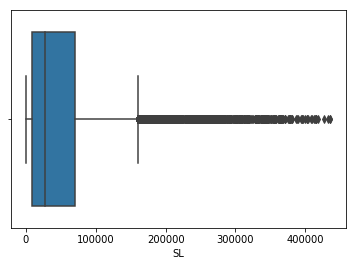

In [8]:
sns.boxplot(x=df['SL'])

In [9]:
hi_SL=31189+1.5*(8076-9941)
hi_SL

28391.5

In [10]:
df[df['SL']>28391.5].count()

Unnamed: 0     7637
ACTIVITY       7637
TIME           7637
SL             7637
EEG            7637
BP             7637
HR             7637
CIRCLUATION    7637
FALL           7637
dtype: int64

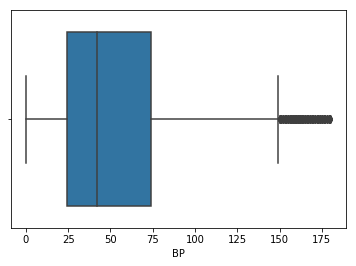

In [11]:
sns.boxplot(x=df['BP'])

In [12]:
df[df['BP']>300].count()

Unnamed: 0     0
ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
FALL           0
dtype: int64

Since the blood pressure machine would only measure up to 300, so all the data that BP>300 are false data.Many individuals have, on various health forums, reported to have experienced (systolic) blood pressure in excess of 250. Most of these individuals have also claimed to experience extreme medical conditions, such as a heavy buzzing in the ears, uncontrollably intense headaches, dizziness and even loss of consciousness.

In [13]:
df=df[df['BP']<=250]

Low blood pressure is BP<60.

In [14]:
df[df['BP']<=10].count()

Unnamed: 0     769
ACTIVITY       769
TIME           769
SL             769
EEG            769
BP             769
HR             769
CIRCLUATION    769
FALL           769
dtype: int64

Blood pressure higher than 180 is high blood pressure.

In [15]:
df_hibp=df[df['BP']>180]

In [16]:
df_hibp.count()

Unnamed: 0     0
ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
FALL           0
dtype: int64

In [17]:
df_lowbp=df[df['BP']<=10]

In [18]:
df_lowbp.count()

Unnamed: 0     769
ACTIVITY       769
TIME           769
SL             769
EEG            769
BP             769
HR             769
CIRCLUATION    769
FALL           769
dtype: int64

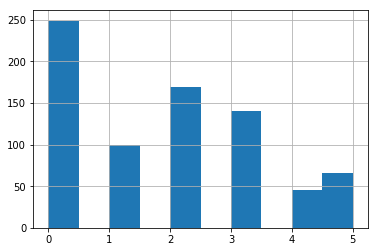

In [19]:
df_lowbp['ACTIVITY'].hist()

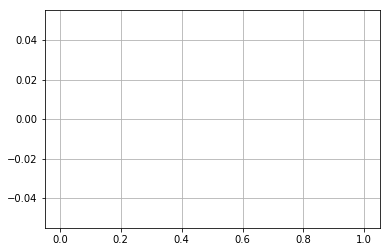

In [20]:
df_hibp['ACTIVITY'].hist()

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

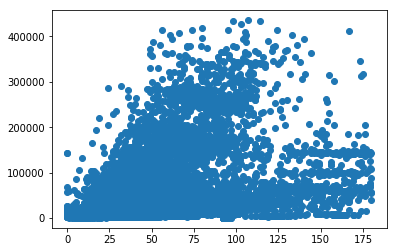

In [22]:
plt.scatter(df['BP'],df['SL'])

In [23]:
df[df['SL']>2000000].count()

Unnamed: 0     0
ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
FALL           0
dtype: int64

In [24]:
df=df[df['SL']<2000000]

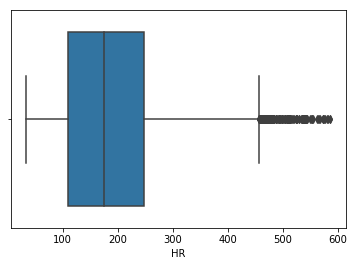

In [25]:
sns.boxplot(x=df['HR'])

In [26]:
df.shape

(15371, 9)

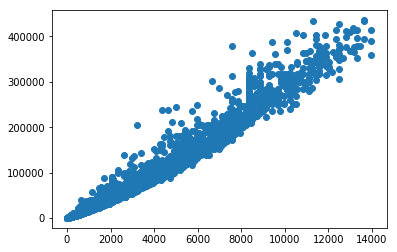

In [27]:
plt.scatter(df['CIRCLUATION'],df['SL'])

In [28]:
from scipy import stats
df_new=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [113]:
df_new.shape

(15371, 9)

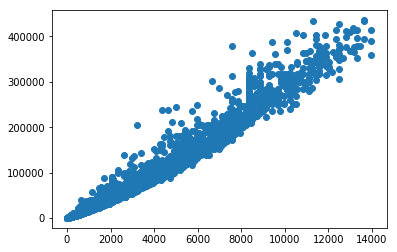

In [114]:
plt.scatter(df_new['CIRCLUATION'],df_new['SL'])

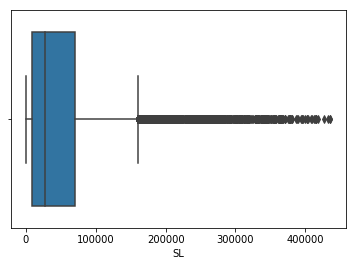

In [115]:
sns.boxplot(x=df_new['SL'])

In [123]:
df_new.to_csv('fall_new.csv')

In [117]:
df_new.head()

,Unnamed: 0,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALL
0,0,3,4722.92,4019.64,-1600.00,13,79,317,1
1,1,2,4059.12,2191.03,-1146.08,20,54,165,0
2,2,2,4773.56,2787.99,-1263.38,46,67,224,0
3,3,4,8271.27,9545.98,-2848.93,26,138,554,0
4,4,4,7102.16,14148.80,-2381.15,85,120,809,0


In [119]:
df_new.head()

,Unnamed: 0,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALL
0,0,3,4722.92,4019.64,-1600.00,13,79,317,1
1,1,2,4059.12,2191.03,-1146.08,20,54,165,0
2,2,2,4773.56,2787.99,-1263.38,46,67,224,0
3,3,4,8271.27,9545.98,-2848.93,26,138,554,0
4,4,4,7102.16,14148.80,-2381.15,85,120,809,0


In [121]:
df_new=df_new.drop(df.columns[0], axis=1)

In [122]:
df_new.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALL
0,3,4722.92,4019.64,-1600.00,13,79,317,1
1,2,4059.12,2191.03,-1146.08,20,54,165,0
2,2,4773.56,2787.99,-1263.38,46,67,224,0
3,4,8271.27,9545.98,-2848.93,26,138,554,0
4,4,7102.16,14148.80,-2381.15,85,120,809,0
